# Prova 02_02_2022
# Parte 1:
Quante sono le istanze contenute nel dataset? **299** Il dataset è completo (cioè per ogni
istanza tutti i valori di ogni attributo sono sempre correttamente specificati – non esistono

“missing values”)? **no** Il dataset è bilanciato per quanto riguarda la classe da predire?
**sbilanciato** I casi raccolti nel dataset sono equamente distribuiti per età? **no**

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Data/heart_failure_clinical_records_dataset.csv",sep=',')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [4]:
df.groupby("DEATH_EVENT")["time"].count()

DEATH_EVENT
0    203
1     96
Name: time, dtype: int64

In [5]:
df.groupby("age")["time"].count()

age
40.000     7
41.000     1
42.000     7
43.000     1
44.000     2
45.000    19
46.000     3
47.000     1
48.000     2
49.000     4
50.000    27
51.000     4
52.000     5
53.000    10
54.000     2
55.000    17
56.000     1
57.000     2
58.000    10
59.000     4
60.000    33
60.667     2
61.000     4
62.000     5
63.000     8
64.000     3
65.000    26
66.000     2
67.000     2
68.000     5
69.000     3
70.000    25
72.000     7
73.000     4
75.000    11
77.000     2
78.000     2
79.000     1
80.000     7
81.000     1
82.000     3
85.000     6
86.000     1
87.000     1
90.000     3
94.000     1
95.000     2
Name: time, dtype: int64

<AxesSubplot:>

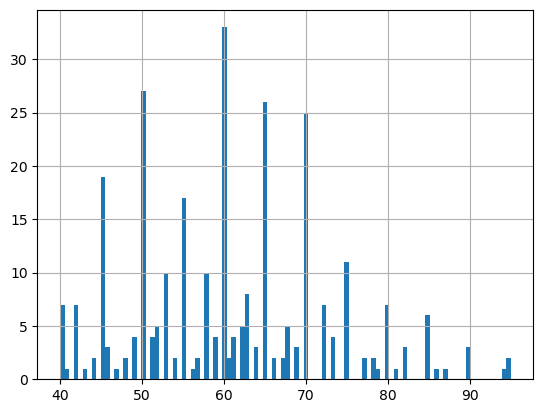

In [6]:
df.age.hist(bins=100)

# 1.2
Verificare se è vero che ci sono meno decessi tra le donne (sex = 0). Rappresentare
graficamente se possibile quanto emerge dai dati:
Sono circa uguali


In [7]:
new_df = df.copy()
new_df_female = new_df.loc[new_df.sex == 0]
new_df_male = new_df.loc[new_df.sex == 1]

In [8]:
new_df_female.groupby("DEATH_EVENT")["age"].count() / len(new_df_female)

DEATH_EVENT
0    0.67619
1    0.32381
Name: age, dtype: float64

In [9]:
new_df_male.groupby("DEATH_EVENT")["age"].count() / len(new_df_male)

DEATH_EVENT
0    0.680412
1    0.319588
Name: age, dtype: float64

<AxesSubplot:xlabel='sex'>

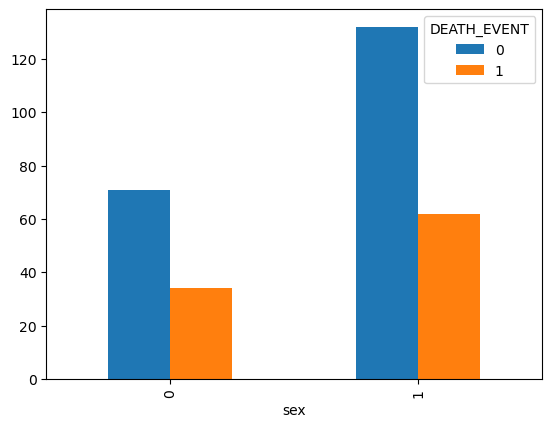

In [10]:
pd.pivot_table(df, 'age', index="sex", columns='DEATH_EVENT', aggfunc='count').plot(kind="bar")

# 1.3
Realizzare una pivot_table in cui rappresentare la percentuale di decessi considerando la
variabile age (sulle righe e suddivisa in 5 gruppi), la variabile sex e la variabile smoking
(entrambe sulle colonne)

In [11]:
# fare il bin della age
new_df = df.copy()
ages = pd.cut(new_df["age"],bins=5)
new_df["age"] = ages.values
new_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,"(73.0, 84.0]",0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,"(51.0, 62.0]",0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,"(62.0, 73.0]",0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,"(39.945, 51.0]",1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,"(62.0, 73.0]",1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,"(51.0, 62.0]",0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,"(51.0, 62.0]",0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,"(39.945, 51.0]",0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,"(39.945, 51.0]",0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [12]:
table = pd.pivot_table(new_df,values="DEATH_EVENT", index="age", columns=["sex","smoking"],fill_value=0)
table

sex                    0              1          
smoking                0    1         0         1
age                                              
(39.945, 51.0]  0.258065  1.0  0.346154  0.100000
(51.0, 62.0]    0.333333  1.0  0.218750  0.250000
(62.0, 73.0]    0.250000  0.5  0.260870  0.357143
(73.0, 84.0]    0.750000  0.0  0.571429  0.444444
(84.0, 95.0]    0.500000  0.0  0.714286  1.000000

## 1.4
Verificare se è vero che generalmente le persone anemiche (anaemia==true) sono anche
diabetiche (diabetes == true)

No generalmente no

In [13]:
new_df = df.copy()
new_df_anaemia_diabetes = new_df.loc[(new_df.anaemia == 1) & (new_df.diabetes == 1)]
new_df_anaemia_diabetes.shape[0] / new_df.loc[(new_df.anaemia == 1)].shape[0]

0.4108527131782946

# 1.5
La frequenza dei decessi è uniforme nelle età considerate nel dataset? Mostrare l’analisi
attraverso un opportuno grafico

<AxesSubplot:>

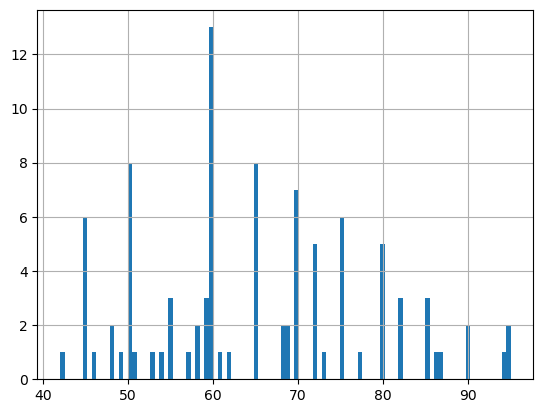

In [14]:
new_df = df.copy()
new_df = new_df.loc[new_df.DEATH_EVENT == 1]
new_df["age"].hist(bins=100)

# Parte 2:
## 2.1
Si vuole predire il valore di death event sulla base degli attributi presenti nel dataset.
Dividere il dataset in modo che 2/3 degli elementi siano contenuti in un nuovo dataset “train” e
1/3 nel dataset “test”. Eliminare gli eventuali attributi che non concorrono alla predizione
(identificatori se presenti o altri attributi, giustificare la scelta).
Allenare il train con il modello Decision Tree e valutare l’accuracy ottenuta calcolata sia sul
dataset train sia sul dataset test. Confrontare i risultati ottenuti con quelli ottenuti con una
predizione basata sul modello Logistic Regression (ignorare eventuali warning). Effettuare alcune
considerazioni sui risultati ottenuti, tenendo in considerazione anche l’analisi della confusion
matrix e la predizione effettuata da un dummy classifier.

In [15]:
new_df  = df.copy()

In [16]:
new_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [17]:
new_df.drop("time",axis=1,inplace=True)
new_df
# il tempo di osservazione del paziente non incide sulla predizione

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,0


In [18]:
y = new_df["DEATH_EVENT"]
new_df.drop("DEATH_EVENT",axis=1,inplace=True)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_df, y,test_size=1/3,random_state=0)
train = X_train.assign(death=y_train)
test = X_test.assign(death=y_test)
train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,death
280,70.0,0,2695,1,40,0,241000.0,1.0,137,1,0,0
248,40.0,0,624,0,35,0,301000.0,1.0,142,1,1,0
126,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,1
171,52.0,0,3966,0,40,0,325000.0,0.9,140,1,1,0
71,58.0,0,582,1,35,0,122000.0,0.9,139,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
251,55.0,0,572,1,35,0,231000.0,0.8,143,0,0,0
192,50.0,1,121,1,40,0,260000.0,0.7,130,1,0,0
117,85.0,1,102,0,60,0,507000.0,3.2,138,0,0,0
47,60.0,0,582,1,38,1,451000.0,0.6,138,1,1,1


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix

def test_model(name ,model,train_data, test_data, train_labels, test_labels):
    model.fit(train_data,train_labels)
    train_preds = model.predict(train_data)
    test_preds = model.predict(test_data)
    print(f" ===== {name} =====")
    print(f"Accuracy on train {accuracy_score(train_labels, train_preds)}")
    print(f"Accuracy on test {accuracy_score(test_labels, test_preds)}")
    print("Confusion matrix on test")
    print(confusion_matrix(test_labels, test_preds))


In [21]:
classifiers = [DecisionTreeClassifier(), LogisticRegression(), DummyClassifier()]

names = ["DT","LR", "dummy"]

for model,name in zip(classifiers,names):
    test_model(name,model, X_train, X_test, y_train, y_test)

 ===== DT =====
Accuracy on train 1.0
Accuracy on test 0.71
Confusion matrix on test
[[53 15]
 [14 18]]
 ===== LR =====
Accuracy on train 0.7738693467336684
Accuracy on test 0.68
Confusion matrix on test
[[59  9]
 [23  9]]
 ===== dummy =====
Accuracy on train 0.678391959798995
Accuracy on test 0.68
Confusion matrix on test
[[68  0]
 [32  0]]


Sia nel Decision Tree che nella Logistic Regression l'accuracy calcolata nella fase di train è migliore in quella calcolata nella fase di test, questo vuole dire che entrambi i modelli fanno dell'overfitting.
Il DT non predice correttamente i falsi negativi

# 2.2
Confrontare l’accuratezza ottenuta nel punto precedente con l’accuratezza si ottiene con una
5 Fold cross validation.


In [22]:
from sklearn.model_selection import cross_val_score

for model,name in zip(classifiers,names):
    scores = cross_val_score(model, new_df,y, cv=5)
    print(f"Accuracy of :{name} is: ",scores.mean())
    print(scores)


Accuracy of :DT is:  0.6822598870056498
[0.61666667 0.73333333 0.68333333 0.7        0.6779661 ]
Accuracy of :LR is:  0.7324293785310735
[0.75       0.73333333 0.68333333 0.76666667 0.72881356]
Accuracy of :dummy is:  0.6789265536723164
[0.66666667 0.68333333 0.68333333 0.68333333 0.6779661 ]


# 2.3
Considerare il dataset originale, eliminare l’attributo time, scalare il valore degli attributi a

un intervallo (0,1) e allenare sui dati un modello di LinearRegression (https://scikit-
learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear

_model.LinearRegression). Analizzare poi i coefficienti del modello e individuare i 5 attributi che
in valore assoluto hanno il valore più elevato. Costruire un nuovo dataset composto unicamente
di quei 5 attributi, e usare la tecnica 5 Fold cross validation per valutare se l’accuratezza del
modello Decision Tree migliora.

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaled_df = new_df.copy()
model_lr = classifiers[1]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_df = scaler.fit_transform(scaled_df)
scaled_df = pd.DataFrame(scaled_df,columns=new_df.columns.tolist())

In [24]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y,test_size=1/3,random_state=0)
model_lr.fit(X_train,y_train)
preds = model_lr.predict(X_test)
score = accuracy_score(y_test,preds)
score

0.71

In [25]:
model_lr.coef_

array([[ 2.05685039,  0.1339354 ,  0.76018771,  0.0092003 , -2.51168851,
         0.27268921, -0.10465316,  1.51534293, -1.26299002, -0.16780091,
        -0.07027497]])

In [26]:
abs_values =abs(model_lr.coef_)
abs_values

array([[2.05685039, 0.1339354 , 0.76018771, 0.0092003 , 2.51168851,
        0.27268921, 0.10465316, 1.51534293, 1.26299002, 0.16780091,
        0.07027497]])

In [27]:
index = [0, 2, 4, 7, 8]
new_coef_df = new_df.iloc[:,index]
new_coef_df

,age,creatinine_phosphokinase,ejection_fraction,serum_creatinine,serum_sodium
0,75.0,582,20,1.9,130
1,55.0,7861,38,1.1,136
2,65.0,146,20,1.3,129
3,50.0,111,20,1.9,137
4,65.0,160,20,2.7,116
...,...,...,...,...,...
294,62.0,61,38,1.1,143
295,55.0,1820,38,1.2,139
296,45.0,2060,60,0.8,138
297,45.0,2413,38,1.4,140


In [28]:
model_td =  classifiers[0]
scores = cross_val_score(model_td, new_coef_df, y, cv=5)
print(f"Accuracy of DT is: ",scores.mean())
print(scores)

Accuracy of DT is:  0.6724293785310734
[0.58333333 0.73333333 0.6        0.71666667 0.72881356]


# 2.4
Considerare il dataset originale, eliminare l’attributo time, e creare una pipeline in cui il
valore degli attributi age e platelets sia discretizzato in 6 intervalli e gli attributi non booleani
vengano ricondotti a valori nell’intervallo (0,1) e normalizzati con la funzione Normalizer. Si
applichi poi un modello DecisionTree e si valuti l’accuratezza.

In [29]:
new_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0
...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_df, y,test_size=1/3,random_state=0)

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer


scaled_pipeline = Pipeline(steps=[("scaler",MinMaxScaler(feature_range=(0,1))),
                                  ("normalized",Normalizer())],verbose=True)

column_trasform = ColumnTransformer(transformers=[('age', KBinsDiscretizer(n_bins=6,strategy="uniform", encode="ordinal"),["age"]),
                                                  ('platelets', KBinsDiscretizer(n_bins=6, strategy="uniform", encode="ordinal"),["platelets"]),
                                                  ('scale_norma', scaled_pipeline,['creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'serum_sodium'])], remainder="passthrough")

my_pipeline = Pipeline(steps=[("trasformer",column_trasform), ("model",model_td)],verbose=True)

test_model("Pipeline ",my_pipeline, X_train, X_test, y_train, y_test)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing normalized, total=   0.0s
[Pipeline] ........ (step 1 of 2) Processing trasformer, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s
 ===== Pipeline  =====
Accuracy on train 1.0
Accuracy on test 0.63
Confusion matrix on test
[[50 18]
 [19 13]]


<AxesSubplot:>

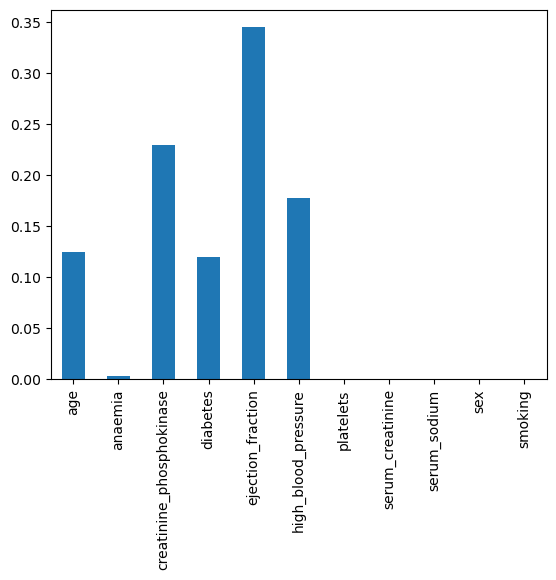

In [43]:
import matplotlib.pyplot as plt
importanza = model_td.feature_importances_
std = np.std([model_td.feature_importances_],axis=0)
DF_importanza = pd.Series(importanza,index=new_df.columns.tolist())
fig,ax = plt.subplots()
DF_importanza.plot.bar(yerr=std,ax=ax)

# 2.5
Applicare una funzione per l’ottimizzazione dei parametri (sia del modello di classificazione
sia della pipeline) e verificare se l’accuratezza migliora.

In [44]:
from sklearn.model_selection import GridSearchCV

params = {'model__criterion': ("gini", "entropy", "log_loss"),
          'trasformer__age__n_bins' : [5, 20, 30],
          'trasformer__platelets__n_bins' : [5, 20, 30],
          'trasformer__scale_norma__normalized__norm' : ("l1", "l2","max")}

gs = GridSearchCV(my_pipeline,params)

test_model("Scaled Pipeline with GridSearch",gs, X_train, X_test, y_train, y_test)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing normalized, total=   0.0s
[Pipeline] ........ (step 1 of 2) Processing trasformer, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing normalized, total=   0.0s
[Pipeline] ........ (step 1 of 2) Processing trasformer, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing normalized, total=   0.0s
[Pipeline] ........ (step 1 of 2) Processing trasformer, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing normalized, total=   0.0s
[Pipel

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
135 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.9/site-pa

In [45]:
gs.best_params_

{'model__criterion': 'entropy',
 'trasformer__age__n_bins': 5,
 'trasformer__platelets__n_bins': 30,
 'trasformer__scale_norma__normalized__norm': 'l2'}

In [46]:
my_pipeline.set_params(**gs.best_params_)

test_model("Pipeline ",my_pipeline, X_train, X_test, y_train, y_test)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing normalized, total=   0.0s
[Pipeline] ........ (step 1 of 2) Processing trasformer, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s
 ===== Pipeline  =====
Accuracy on train 1.0
Accuracy on test 0.68
Confusion matrix on test
[[52 16]
 [16 16]]


# 2.6
Creare una pipeline che aggiunga alle features della pipeline del punto 4, le feature che

derivano dalla applicazione di una [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) (mantenendo due

dimensioni) e le feature che derivano dalla applicazione della funzione [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html?highlight=selectkbest#sklearn.feature_selection.SelectKBest) ( scegliendo K=2).

In [ ]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import FeatureUnion
from  sklearn.preprocessing import FunctionTransformer

pca = PCA(n_components=2)
kbest = SelectKBest(k=2)

def identity(X):
    return X

combined = FeatureUnion([("pca",pca), ("kbest",kbest), ('passtrough', FunctionTransformer(identity, validate=True))])


my_pipeline = Pipeline(steps=[('trasformer',column_trasform), ('combine_feature',combined), ("model",model_td)],verbose=True)

test_model("Pipeline ",my_pipeline, X_train, X_test, y_train, y_test)